In [210]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
%matplotlib inline

In [211]:
# importing data

df = pd.read_csv(r'C:\Users\ageno\Desktop\saulon\CovidNumerico.csv')
df.head()

,x,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-02-26,1.0,1.0,0.0,0.0,1.0,0.0
2,2,2020-02-27,1.0,0.0,0.0,0.0,1.0,0.0
3,3,2020-02-28,1.0,0.0,0.0,0.0,0.0,1.0
4,4,2020-02-29,2.0,1.0,0.0,0.0,1.0,1.0


In [212]:
# Checking the dataset size

df.shape

(971, 8)

In [213]:
# check for Null vales

df.isna().sum()

x                        0
data                     1
casosAcumulado           1
casosNovos               1
obitosAcumulado          1
obitosNovos              1
Recuperadosnovos         1
emAcompanhamentoNovos    1
dtype: int64

In [214]:
# Checking the columns

df.columns

Index(['x', 'data', 'casosAcumulado', 'casosNovos', 'obitosAcumulado',
       'obitosNovos', 'Recuperadosnovos', 'emAcompanhamentoNovos'],
      dtype='object')

In [215]:
# Applying linear interpolation to get rid of missing values

df_interpolated = df.interpolate()

In [216]:
# check for Null vales

df_interpolated.isna().sum()

x                        0
data                     1
casosAcumulado           0
casosNovos               0
obitosAcumulado          0
obitosNovos              0
Recuperadosnovos         0
emAcompanhamentoNovos    0
dtype: int64

In [217]:
# Checking the dataframe for the remaining missing value

df_interpolated

,x,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-02-26,1.0,1.0,0.0,0.0,1.0,0.0
2,2,2020-02-27,1.0,0.0,0.0,0.0,1.0,0.0
3,3,2020-02-28,1.0,0.0,0.0,0.0,0.0,1.0
4,4,2020-02-29,2.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
966,966,2022-10-18,34762873.0,8283.0,687326.0,83.0,33984783.0,90764.0
967,967,2022-10-19,34771320.0,8447.0,687423.0,97.0,33993798.0,90099.0
968,968,2022-10-20,34776259.0,4939.0,687483.0,60.0,33996688.0,92088.0
969,969,2022-10-21,34780462.0,4203.0,687527.0,44.0,33998942.0,93993.0


In [218]:
# Applying backward filling method to get rid of the missing value

df_bfill = df_interpolated.bfill()

In [219]:
# check for Null vales

df_bfill.isna().sum()

x                        0
data                     1
casosAcumulado           0
casosNovos               0
obitosAcumulado          0
obitosNovos              0
Recuperadosnovos         0
emAcompanhamentoNovos    0
dtype: int64

In [220]:
df_bfill

,x,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-02-26,1.0,1.0,0.0,0.0,1.0,0.0
2,2,2020-02-27,1.0,0.0,0.0,0.0,1.0,0.0
3,3,2020-02-28,1.0,0.0,0.0,0.0,0.0,1.0
4,4,2020-02-29,2.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
966,966,2022-10-18,34762873.0,8283.0,687326.0,83.0,33984783.0,90764.0
967,967,2022-10-19,34771320.0,8447.0,687423.0,97.0,33993798.0,90099.0
968,968,2022-10-20,34776259.0,4939.0,687483.0,60.0,33996688.0,92088.0
969,969,2022-10-21,34780462.0,4203.0,687527.0,44.0,33998942.0,93993.0


In [221]:
# criando uma lista com o nome das colunas

columns = list(df_bfill.columns)
columns

['x',
 'data',
 'casosAcumulado',
 'casosNovos',
 'obitosAcumulado',
 'obitosNovos',
 'Recuperadosnovos',
 'emAcompanhamentoNovos']

In [222]:
# ordem do polinomio

poly_order = 3

In [223]:
# Aplicando o filtro

filtered = {}

for i in range(2, len(columns)):
    filtered[columns[i]] = ss.savgol_filter(df_bfill[columns[i]], 5, poly_order)

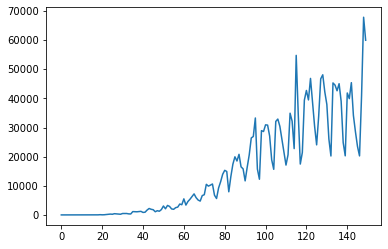

In [224]:
# valor

plt.plot(df_bfill[columns[3]][0:150])

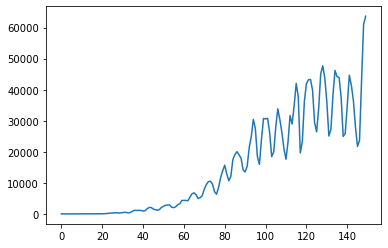

In [225]:
# filtrado
plt.plot(filtered[columns[3]][0:150])